In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

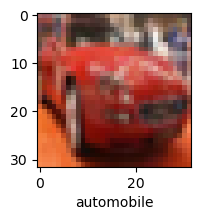

In [13]:
plot_sample(X_train, y_train, 5)

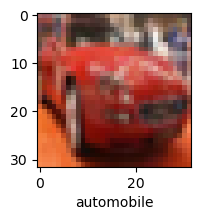

In [14]:
plot_sample(X_train, y_train, 5)

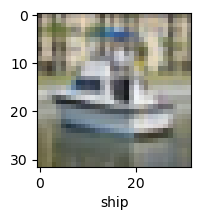

In [15]:
plot_sample(X_train, y_train, 501)

In [16]:
X_train =X_train / 255.0
X_test = X_test / 255.0

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation ='relu'),
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation ='softmax'),
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics =['accuracy'])

ann.fit(X_train, y_train, epochs=5)

E:\Anaconda ML\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 29ms/step - accuracy: 0.3075 - loss: 1.9298
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4159 - loss: 1.6476
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.4520 - loss: 1.5478
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4750 - loss: 1.4873
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4902 - loss: 1.4353


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.52      0.54      0.53      1000
           1       0.66      0.57      0.61      1000
           2       0.33      0.52      0.40      1000
           3       0.36      0.23      0.28      1000
           4       0.40      0.41      0.41      1000
           5       0.37      0.42      0.39      1000
           6       0.62      0.33      0.43      1000
           7       0.59      0.53      0.56      1000
           8       0.53      0.71      0.61      1000
           9       0.57      0.52      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [19]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

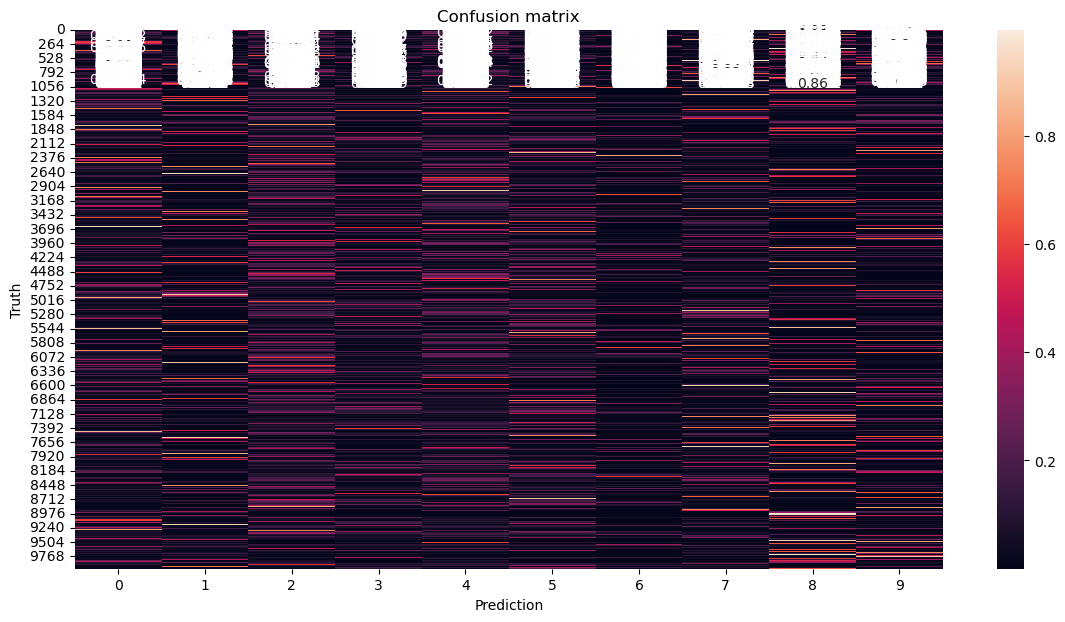

In [20]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),

])
   
              

E:\Anaconda ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3715 - loss: 1.7207
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5909 - loss: 1.1564
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6547 - loss: 0.9845
Epoch 4/10
1342/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6853 - loss: 0.9077

In [ ]:
cnn.evaluate(X_test, y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test, 60)

In [ ]:
plot_sample(X_test, y_test, 100)

In [ ]:
plot_sample(X_test, y_test, 79)

In [ ]:
classes[y_classes[59]]